'Query (q): tensor([1.0000, 0.5000, 0.8000])'

'Key (k): tensor([0.2000, 0.9000, 0.3000])'

'Value (v): tensor([0.1000, 0.4000, 0.7000])'

'Raw score: 0.8900'

'Scaled score: 0.5138'

'Softmax: 1.0000'

'Output: tensor([0.1000, 0.4000, 0.7000])'

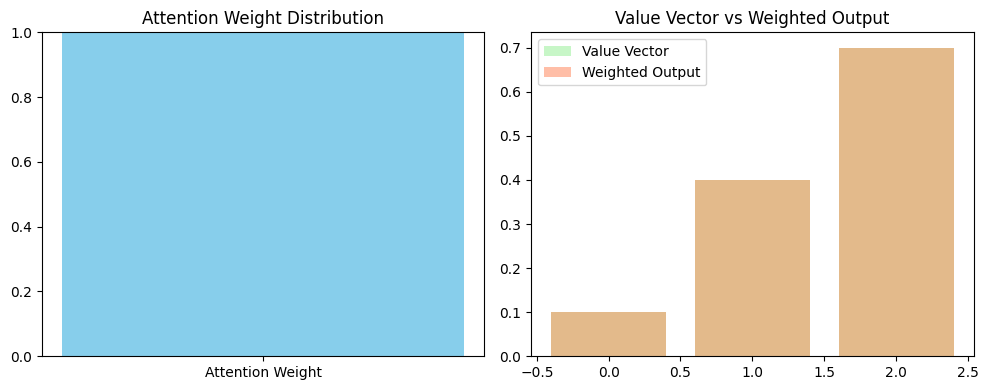

In [3]:
import torch

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Create example Q, K, V vectors
q = torch.tensor([1.0, 0.5, 0.8])
k = torch.tensor([0.2, 0.9, 0.3])
v = torch.tensor([0.1, 0.4, 0.7])

display(HTML("<h3>Input Vectors:</h3>"))
display(f"Query (q): {q}")
display(f"Key (k): {k}")
display(f"Value (v): {v}")

# Calculate attention scores (Q·K^T)
attention_scores = torch.dot(q, k)
display(HTML("<h3>Attention Score (Q·K^T):</h3>"))
display(f"Raw score: {attention_scores:.4f}")

# Apply softmax scaling
scaled_attention = attention_scores / np.sqrt(k.shape[0])
display(HTML("<h3>Scaled Attention Score (Q·K^T/√d_k):</h3>"))
display(f"Scaled score: {scaled_attention:.4f}")

# Calculate softmax
softmax_attention = torch.softmax(torch.tensor([scaled_attention]), dim=0)
display(HTML("<h3>Softmax Output:</h3>"))
display(f"Softmax: {softmax_attention.item():.4f}")

# Calculate final attention (softmax * V)
output = softmax_attention * v
display(HTML("<h3>Final Output (softmax * V):</h3>"))
display(f"Output: {output}")

# Visualize attention weights
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(['Attention Weight'], [softmax_attention.item()], color='skyblue')
plt.title('Attention Weight Distribution')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(range(len(v)), v.numpy(), alpha=0.5, label='Value Vector', color='lightgreen')
plt.bar(range(len(output)), output.numpy(), alpha=0.5, label='Weighted Output', color='coral')
plt.title('Value Vector vs Weighted Output')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
Q = torch.tensor([
    [1.0, 0.5, 0.8],
    [0.7, 0.6, 0.2],
])

K_T = torch.tensor([
    [0.2, 0.8],
    [0.9, 0.4],
    [0.3, 0.1]
])

Q @ K_T

tensor([[0.8900, 1.0800],
        [0.7400, 0.8200]])

In [ ]:
Q = torch.tensor([
    [1.0, 0.5, 0.8],
    [0.7, 0.6, 0.2]
])

K = torch.tensor([
    [0.2, 0.9, 0.3],
    [0.8, 0.4, 0.1]
])

Q:    ([[1.0000, 0.5000, 0.8000],
        [0.7000, 0.6000, 0.2000],
        [0.4000, 0.9000, 0.1000]])
K:    ([[0.2000, 0.9000, 0.3000],
        [0.8000, 0.4000, 0.1000],
        [0.5000, 0.2000, 0.7000]])
V:    ([[0.1000, 0.4000, 0.7000],
        [0.3000, 0.2000, 0.5000],
        [0.8000, 0.6000, 0.1000]])


raw:  ([[0.8900, 1.0800, 1.1600],
        [0.7400, 0.8200, 0.6100],
        [0.9200, 0.6900, 0.4500]])


scld: ([[0.5138, 0.6235, 0.6697],
        [0.4272, 0.4734, 0.3522],
        [0.5312, 0.3984, 0.2598]])


mask: ([[ 5.1384e-01, -1.0000e+09, -1.0000e+09],
        [ 4.2724e-01,  4.7343e-01, -1.0000e+09],
        [ 5.3116e-01,  3.9837e-01,  2.5981e-01]])


soft: ([[1.0000, 0.0000, 0.0000],
        [0.4885, 0.5115, 0.0000],
        [0.3791, 0.3319, 0.2890]])


out:  ([[0.1000, 0.4000, 0.7000],
        [0.2023, 0.2977, 0.5977],
        [0.3687, 0.3914, 0.4602]])


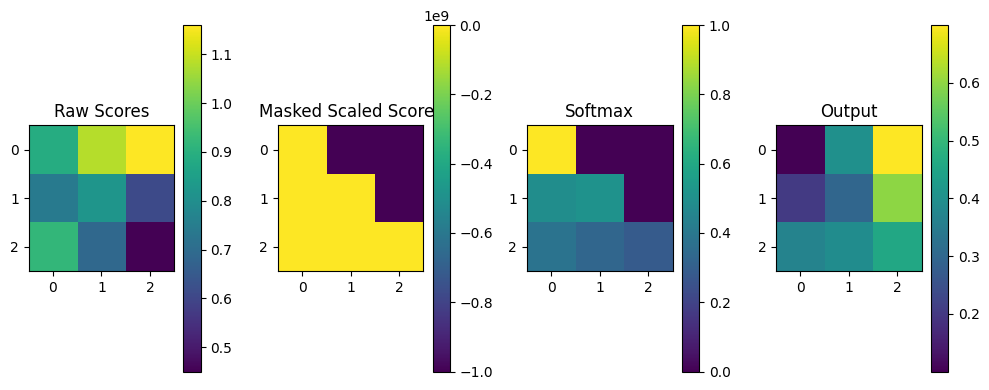

In [26]:
# Create example Q, K, V matrices (sequence_length=3, embedding_dim=3)
Q = torch.tensor([
    [1.0, 0.5, 0.8],
    [0.7, 0.6, 0.2], 
    [0.4, 0.9, 0.1]
])

K = torch.tensor([
    [0.2, 0.9, 0.3],
    [0.8, 0.4, 0.1],
    [0.5, 0.2, 0.7]
])

V = torch.tensor([
    [0.1, 0.4, 0.7],
    [0.3, 0.2, 0.5],
    [0.8, 0.6, 0.1]
])

display(HTML("<h3>Input Matrices:</h3>"))
print(str(Q).replace("tensor", "Q:    "))
print(str(K).replace("tensor", "K:    "))
print(str(V).replace("tensor", "V:    "))

# Calculate attention scores (Q·K^T)
attention_scores = torch.matmul(Q, K.T)
display(HTML("<h3>Attention Scores (Q·K^T):</h3>"))
print(str(attention_scores).replace("tensor", "raw:  "))

# Apply scaling
d_k = K.size(-1)
scaled_attention = attention_scores / np.sqrt(d_k)
display(HTML("<h3>Scaled Attention Scores (Q·K^T/√d_k):</h3>"))
print(str(scaled_attention).replace("tensor", "scld: "))

# Create causal mask (lower triangular) and apply to scaled scores
mask = torch.triu(torch.ones_like(scaled_attention), diagonal=1) * -1e9
scaled_attention = scaled_attention + mask

display(HTML("<h3>Masked Scaled Attention Scores:</h3>"))
print(str(scaled_attention).replace("tensor", "mask: "))

# Calculate softmax
softmax_attention = torch.softmax(scaled_attention, dim=-1)
display(HTML("<h3>Softmax Output:</h3>"))
print(str(softmax_attention).replace("tensor", "soft: "))

# Calculate final attention (softmax * V)
output = torch.matmul(softmax_attention, V)
display(HTML("<h3>Final Output (softmax * V):</h3>"))
print(str(output).replace("tensor", "out:  "))

# Visualize attention weights
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

# Plot raw scores with mask
im0 = axes[0].imshow(attention_scores.detach())
axes[0].set_title('Raw Scores') 
plt.colorbar(im0, ax=axes[0])

# Plot scaled scores with mask
im1 = axes[1].imshow(scaled_attention.detach())
axes[1].set_title('Masked Scaled Scores')
plt.colorbar(im1, ax=axes[1])

# Plot softmax
im2 = axes[2].imshow(softmax_attention.detach())
axes[2].set_title('Softmax')
plt.colorbar(im2, ax=axes[2])

# Plot output
im3 = axes[3].imshow(output.detach())
axes[3].set_title('Output')
plt.colorbar(im3, ax=axes[3])

plt.tight_layout()
plt.show()


In [25]:
torch.triu(torch.ones_like(attention_scores), diagonal=1)

tensor([[0., 1., 1.],
        [0., 0., 1.],
        [0., 0., 0.]])

'Query (Q): tensor([[[1.0000, 0.5000, 0.8000],\n         [0.7000, 0.6000, 0.2000],\n         [0.4000, 0.9000, 0.1000]],\n\n        [[0.3000, 0.8000, 0.5000],\n         [0.6000, 0.1000, 0.9000],\n         [0.2000, 0.7000, 0.4000]]])'

'Key (K): tensor([[[0.2000, 0.9000, 0.3000],\n         [0.8000, 0.4000, 0.1000],\n         [0.5000, 0.2000, 0.7000]],\n\n        [[0.9000, 0.3000, 0.5000],\n         [0.2000, 0.8000, 0.6000],\n         [0.4000, 0.1000, 0.9000]]])'

'Value (V): tensor([[[0.1000, 0.4000, 0.7000],\n         [0.3000, 0.2000, 0.5000],\n         [0.8000, 0.6000, 0.1000]],\n\n        [[0.2000, 0.5000, 0.3000],\n         [0.7000, 0.9000, 0.4000],\n         [0.1000, 0.3000, 0.8000]]])'

'Raw scores:\ntensor([[[0.8900, 1.0800, 1.1600],\n         [0.7400, 0.8200, 0.6100],\n         [0.9200, 0.6900, 0.4500]],\n\n        [[0.7600, 1.0000, 0.6500],\n         [1.0200, 0.7400, 1.0600],\n         [0.5900, 0.8400, 0.5100]]])'

'Scaled scores:\ntensor([[[0.5138, 0.6235, 0.6697],\n         [0.4272, 0.4734, 0.3522],\n         [0.5312, 0.3984, 0.2598]],\n\n        [[0.4388, 0.5774, 0.3753],\n         [0.5889, 0.4272, 0.6120],\n         [0.3406, 0.4850, 0.2944]]])'

'Softmax:\ntensor([[[0.3044, 0.3397, 0.3558],\n         [0.3361, 0.3520, 0.3118],\n         [0.3791, 0.3319, 0.2890]],\n\n        [[0.3239, 0.3721, 0.3040],\n         [0.3479, 0.2960, 0.3561],\n         [0.3215, 0.3715, 0.3070]]])'

'Output:\ntensor([[[0.4170, 0.4032, 0.4186],\n         [0.3887, 0.3920, 0.4425],\n         [0.3687, 0.3914, 0.4602]],\n\n        [[0.3556, 0.5880, 0.4892],\n         [0.3124, 0.5472, 0.5076],\n         [0.3550, 0.5872, 0.4907]]])'

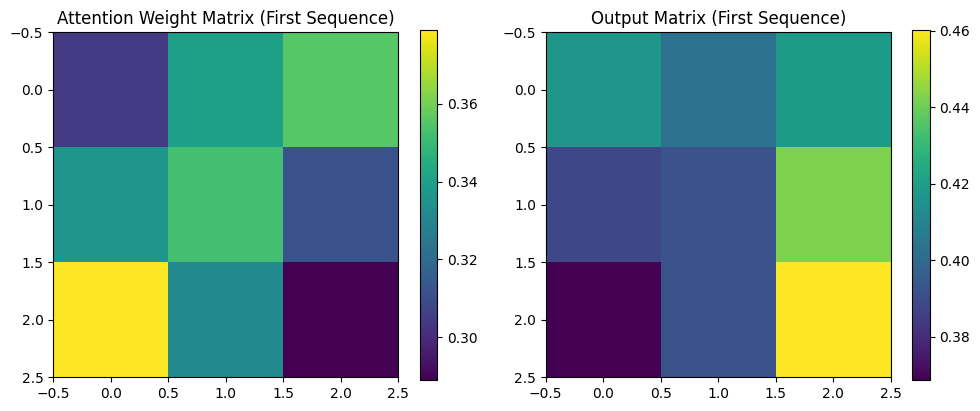

In [4]:
# Create example Q, K, V matrices (batch_size=2, sequence_length=3, embedding_dim=3)
Q = torch.tensor([
    [[1.0, 0.5, 0.8],
     [0.7, 0.6, 0.2],
     [0.4, 0.9, 0.1]],
    [[0.3, 0.8, 0.5], 
     [0.6, 0.1, 0.9],
     [0.2, 0.7, 0.4]]
])

K = torch.tensor([
    [[0.2, 0.9, 0.3],
     [0.8, 0.4, 0.1], 
     [0.5, 0.2, 0.7]],
    [[0.9, 0.3, 0.5],
     [0.2, 0.8, 0.6],
     [0.4, 0.1, 0.9]]
])

V = torch.tensor([
    [[0.1, 0.4, 0.7],
     [0.3, 0.2, 0.5],
     [0.8, 0.6, 0.1]],
    [[0.2, 0.5, 0.3],
     [0.7, 0.9, 0.4],
     [0.1, 0.3, 0.8]]
])

display(HTML("<h3>Input Matrices:</h3>"))
display(f"Query (Q): {Q}")
display(f"Key (K): {K}")
display(f"Value (V): {V}")

# Calculate attention scores (Q·K^T)
attention_scores = torch.bmm(Q, K.transpose(1, 2))
display(HTML("<h3>Attention Scores (Q·K^T):</h3>"))
display(f"Raw scores:\n{attention_scores}")

# Apply scaling
d_k = K.size(-1)
scaled_attention = attention_scores / np.sqrt(d_k)
display(HTML("<h3>Scaled Attention Scores (Q·K^T/√d_k):</h3>"))
display(f"Scaled scores:\n{scaled_attention}")

# Calculate softmax
softmax_attention = torch.softmax(scaled_attention, dim=-1)
display(HTML("<h3>Softmax Output:</h3>"))
display(f"Softmax:\n{softmax_attention}")

# Calculate final attention (softmax · V)
output = torch.bmm(softmax_attention, V)
display(HTML("<h3>Final Output (softmax · V):</h3>"))
display(f"Output:\n{output}")

# Visualize attention weights for first sequence in batch
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(softmax_attention[0].detach().numpy(), cmap='viridis')
plt.title('Attention Weight Matrix (First Sequence)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(output[0].detach().numpy(), cmap='viridis')
plt.title('Output Matrix (First Sequence)')
plt.colorbar()
plt.tight_layout()
plt.show()


In [21]:
import re
from tqdm.notebook import tqdm_notebook

string = "1|23|Loss: 0.6240: 100%|██████████| 23/23 [07:14<00:00, 18.50s/it, advantage=0.0000, advantage_prediction=1.6700, ce=1.1818, entropy=0.8365, entropy_target=0.2365, exploration=1.1376, kl_div=0.4246, policy=0.2253, reinforce=-0.2151, tanh_log_policy=-0.0227, unclipped_policy=0.1026, value=0.0000, weighted_ce=-0.2151, weighted_entropy=0.1519, weighted_kl_div=0.0671]"

def update_tqdm_from_string(string: str, pbar: tqdm_notebook) -> None:
    """Updates a tqdm progress bar state from a progress string.
    
    Args:
        string: The progress string to parse
        pbar: The tqdm progress bar to update
    """
    # Extract main progress components
    # pbar.reset()
    match = re.match(r"(\d+)\|(\d+)\|Loss: ([\d.]+):", string)
    if match:
        epoch, step, loss = match.groups()
        pbar.update(int(step) - pbar.n)

    pbar.set_description(f"{epoch}|{step}|Loss: {loss}")
        
    # Extract postfix metrics
    metrics = {}
    for metric_str in re.findall(r"(\w+)=([\d.-]+)", string):
        key, value = metric_str
        metrics[key] = float(value)
        
    if metrics:
        pbar.set_postfix(**metrics)

pbar = tqdm_notebook(total=23)
update_tqdm_from_string(string, pbar)
pbar.update()
pbar.update()
pbar.refresh()

  0%|          | 0/23 [00:00<?, ?it/s]

True

In [3]:
from dotenv import load_dotenv
from langfuse import Langfuse
from langfuse.openai import AsyncOpenAI

load_dotenv()

langfuse = Langfuse()

In [4]:
langfuse.enabled

True

In [5]:
import os
os.environ["LANGFUSE_PUBLIC_KEY"]

'pk-lf-3598930a-f80e-4074-a6d4-24579d0d2605'

In [6]:
langfuse.auth_check()

True

In [2]:
from langfuse.decorators import observe
from langfuse.openai import openai


@observe
def test() -> None:
    openai.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": "Hello, world!"}],
    )

test()